<a href="https://colab.research.google.com/github/9imm7/Bayesian_inference/blob/main/Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bayesian approach to parameter estimation
When performing **inference** the task that we want to achive is that of **estimating the parameter of a distribution**, the peculiarity of the Bayesian approach stands in the fact that it merge the prior beliefs about the parameter ${\theta}$  (that takes the form of the prior distribution of ${\theta}$, $P({\theta})$) with the evidence coming from the information we gained from observing the data (that takes the form of the likelihood function $P( X | {\theta} )$) and by doing so this approach enable to estimate a probability distribution for the parameter of interest, which is very different from the frequentist approach where the estimate is a point estimate subject to an error controlled by the confidence intervals. \

Model parameters are estimated by establishing them as a distribution conditional on the data we observe.

# $P({\theta} | X )$ = $\frac{P(X|{\theta)P({\theta}})}{P(X )}$ = $\frac{P(X,{\theta})}{P(X )}$

Where :  
$P({\theta})$ is the prior distribution of our model parameter, and represents our opinion before seeing any data.\
$P(X|{\theta)}$ is the likelihood term, indicating how well the prior fits the observed data. \
$P(X )$ is the marginal distribution of the predictor variable. It represents the probability of having observed the data given all the possible values for ${\theta}$. \

But lets go one step at a time. \
In order to understand how bayesian inference works, we will introduce the theoretical part togheter with an application based on a sequence of coin flips. The coin flips that can result in Head(1) or Tail(0) are modelled as a Binomial random variable with parameter $p$ reprenting the probability of observing a head at each flip, $p =0.6$ . \
So we know that when we will try to estimate the probability distribution of the unknown parameter(that's the main point of the Bayesian approach) we shoud observe a higher probability on $p =0.6$, but let's see what happen.









#1° Step-Definition and encoding of our prior beliefs 
# The prior distribution $P({\theta})$ 
The first step in the bayesian workflow is to specify the prior distribution of the random variable of interest( the parameter ${\theta}$ ), it is not based on data, it just comes from intuition, experience or beliefs, basically what $P({\theta})$ does is to encapsulate our ideas about the probability distribution of the random variable ${\theta}$ without having seen any data.
In our example we are working with a Binomial random variable and we know that ${\theta}$  can take values in a range that goes from 0(that means that $p=0$ i.e. the probability of observing a head is 0) to 1(that means that $p=1$ i.e. the probability of observing a head is 1), so we divide the parameter space in equispaced interval of lenght = 0.1, and we assign a probability to each resulting parameter, in this step we are assigning probabilities to the different parameters which in turn are probabilities(of observing a head), but let's see this practically to make it even clearer.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

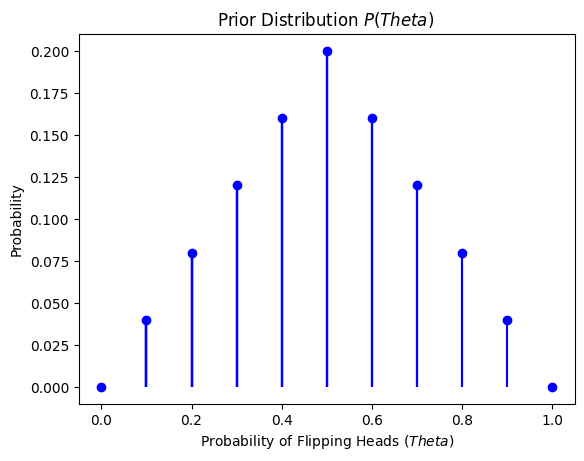

In [ ]:

probabilities = [0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.16, 0.12, 0.08, 0.04, 0]

def generate_prior_df(theta_values = np.linspace(0,1,11), theta_probabilities = probabilities):
    prior_distribution_df = pd.DataFrame(list(zip(theta_values, theta_probabilities)), 
                                         columns = ("Theta", "Probability"))
    return prior_distribution_df

prior_distribution_df = generate_prior_df()
def plot_distribution(df, title: str, likelihood = False):
    plt.scatter(df.iloc[:,0], df.iloc[:,1], color = 'blue')
    for i in range(len(df)):       
        plt.vlines(x = df.iloc[:i,0], color = 'blue', ymin = 0, ymax = df.iloc[:i,1])
    
    if likelihood:
        plt.ylabel("Likelihood")
    else:
        plt.ylabel("Probability")
    plt.xlabel("Probability of Flipping Heads (${Theta}$)")
    plt.title(title)
 
plot_distribution(prior_distribution_df, title = "Prior Distribution $P({Theta})$ ")

With $P({\theta})$ we encoded our prior beliefs in such a way as we can observe from the plot above, from which we can see that we assigned the higher probability to the value 0.5, i.e. our belief about $P({\theta}=0.5)=0.2$, and  $P({\theta}=0.6)=0.16$(remember that this is the true real parameter. Now let's see what happen to the prior distribution once we observe some data.

#2° Step - Collection of data and extraction of information
# The likelihood distribution $P(X|{\theta)}$
Once we have defined and encoded our beliefs, the next step is to collect data and incorporate it into our estimate, such a task is performed by means of the likelihood function, in our case we are dealing with a sequance of $n$ tosses of a coin modelled as a binomial random variable with parameter $p=0.6$. \
The equation for the binomial likelihood is its probability mass function $L(p | n,y) = \binom{n}{y} p^y (1-p)^{n-y}$. \
The likelihood function basically answer the following question : \
Given $n$ tosses and $y$ successes(heads) which is the likelihood that $p$ is the true parameter of the distribution generating the data or equivalently the likelihood function tells us how likely it is that a particular value of $p$ generated the observed data ($y$ successes in $n$ trials). \
Let's collect some data from our binomial with $p=0.6$ and  $n=[1, 10, 25, 50, 100, 500]$ .




In [ ]:
np.random.seed(42)
p = 0.6 
num_tosses = [1, 10, 25, 50, 100, 500] 
num_succes = []
for n in num_tosses:
    tosses = np.random.binomial(1, p, n) 
    num_heads = np.sum(tosses)
    num_succes.append(num_heads)
    print(f"Number of heads in {n} tosses: {num_heads}")

Number of heads in 1 tosses: 1
Number of heads in 10 tosses: 5
Number of heads in 25 tosses: 17
Number of heads in 50 tosses: 32
Number of heads in 100 tosses: 61
Number of heads in 500 tosses: 294


<ipython-input-31-ff064bac72b9>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(likelihood_df)
<ipython-input-31-ff064bac72b9>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(likelihood_df)
<ipython-input-31-ff064bac72b9>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(likelihood_df)
<ipython-input-31-ff064bac72b9>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(likelihood_df)
<ipython-input-31-ff064bac72b9>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

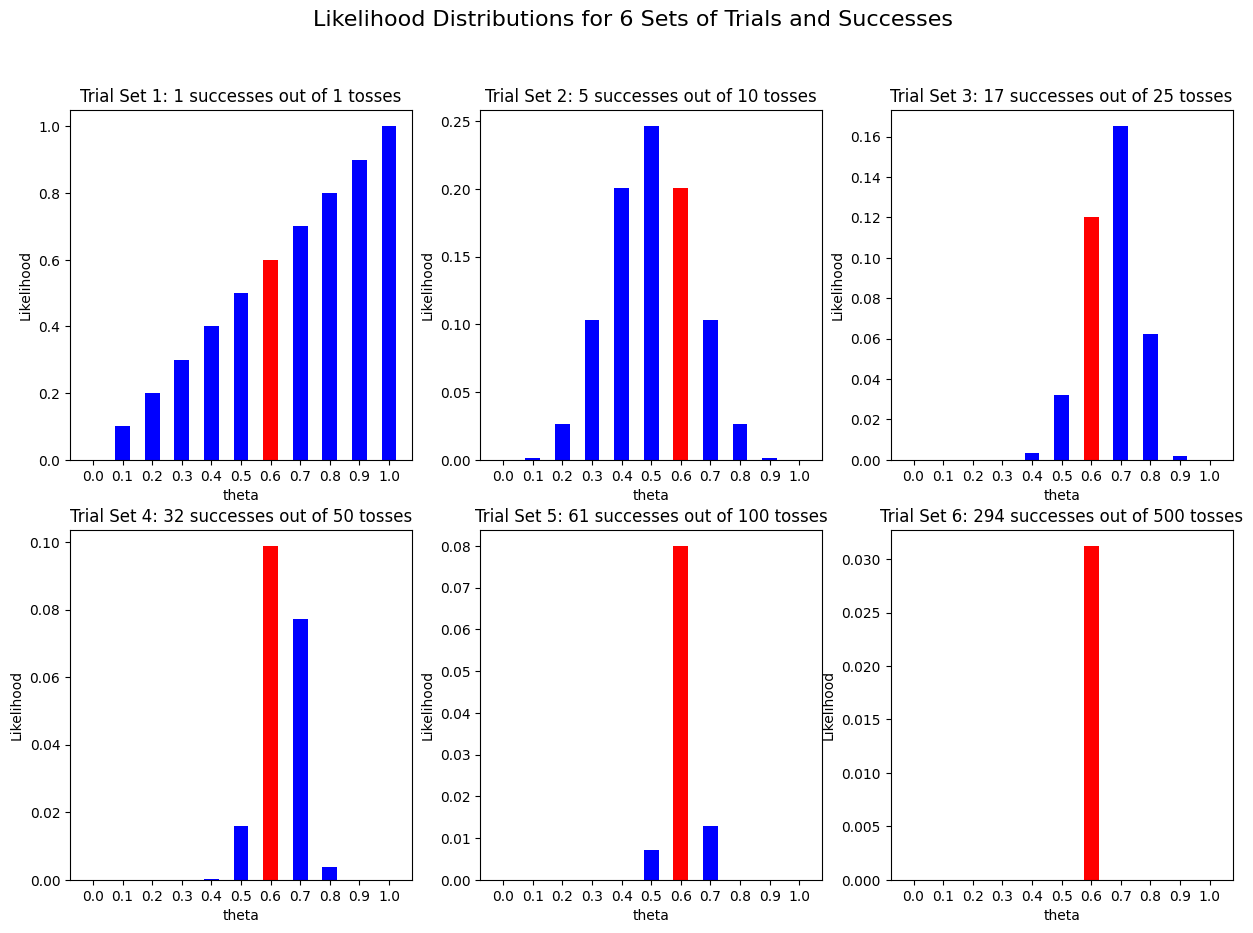

In [ ]:
np.random.seed(42)
def create_likelihood_df(n, heads, prior_df):
    likelihood_vals = stats.binom.pmf(heads, n, prior_df.Theta)
    likelihood_df = pd.DataFrame(list(zip(prior_df.Theta, likelihood_vals)), columns=('Theta', 'Likelihood'))
     
    return likelihood_df

num_tosses = [1, 10, 25, 50, 100, 500]
num_successes = [1, 5, 17, 32, 61, 294]

prior_thetas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

result_df = pd.DataFrame()

for i, (n, heads) in enumerate(zip(num_tosses, num_successes)):
    prior_distribution_df = pd.DataFrame({'Theta': prior_thetas})
    
    likelihood_df = create_likelihood_df(n, heads, prior_distribution_df)
    
    likelihood_df['Trial_Set'] = i
    
    result_df = result_df.append(likelihood_df)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, ax in enumerate(axs.flat):
    trial_set_df = result_df[result_df['Trial_Set'] == i]
    ax.bar(trial_set_df['Theta'], trial_set_df['Likelihood'], width=0.05)
    ax.set_xticks(prior_thetas)
    ax.set_title(f'Trial Set {i+1}: {num_successes[i]} successes out of {num_tosses[i]} tosses')
    ax.set_ylabel('Likelihood')
    ax.set_xlabel('theta')
    ax.bar(trial_set_df['Theta'], trial_set_df['Likelihood'], width=0.05, color=['b'] * 6 + ['r'] + ['b'] * 4)

plt.suptitle('Likelihood Distributions for 6 Sets of Trials and Successes', fontsize=16)
plt.show()

In the above plot we look at the likelihood distribution for 6 different sets of trials with $n=[1, 10, 25, 50, 100, 500]$ extracted from our binomial with $p=0.6$. We can observe that give a trial, and so fixed $n$ and $y$, what the likelihood function does is to assign a a relative probability to each ${\theta}$, it's important to note that the **likelihood distribution is not a probability distribution** but it plays a key role into bayesian inference because allows to update our prior beliefs about ${\theta}$ through a mechanism that assign small likelihood values to parameters not corroborated by data and higer values to parameters that find evidence into the data and this brings us to the last step of the bayesian inference, the computation of the posterior distribution.

#3° Step - Updating our prior beliefs given the empirical evidence 
# The posterior distribution  $P({\theta} | X )$ = $\frac{P(X|{\theta)P({\theta}})}{P(X )}$ = $\frac{P(X,{\theta})}{P(X )}$

The posterior distribution is a reflection of our beliefs about the parameter of interest, incorporating all available information. \
In the bayesian methodology the result of the inferential procedure is expressed in the form of a probability distribution, allowing to place a value on the probability of each potential value of $p$ being correct. \
We treat the parameter as a random variable in order to capture the uncertanty about the true unknown value.\
Now we have all the ingredints to find the posterior distribution since the numerator of the above formula is just the product between the likelihood distribution $P(X|{\theta})$and the prior distribution of the parameter $P({\theta})$ and is equivalent to the joint distribution of the empirical evidence $X$ and the parameter ${\theta}$ while the denominator is the marginal distribution, marginalizing out ${\theta}$, of the numerator. In our case the parameter space is discrete and only takes on 10 values so calculating the denominator is feasible, but when the joint distribution at the numerator  $P(X,{\theta})$ is continous and the random variables are not independent the probelm became computaionally intractable.

In the following plots, keeping fixed the prior distribution, we can observe the bayesian methodology, for the estimation of the posterior distribution of the parameter of interest, in action. Is evident that as the number of observations increases the metodology allows to estimate a distribution closer and closer to the real one, with the limit case in which for a sufficient number of observations the random variable representing the parameter of interest takes on one value, the one of the parameter generating the samples, with a probability equal to $1$, i.e. \
$P({\theta}=$real unknown $p$ | X)= $1$ and $P({\theta}\neq$real unknown $p$ | X)= $0$, which is exactly what we can observe in the trial number 6.

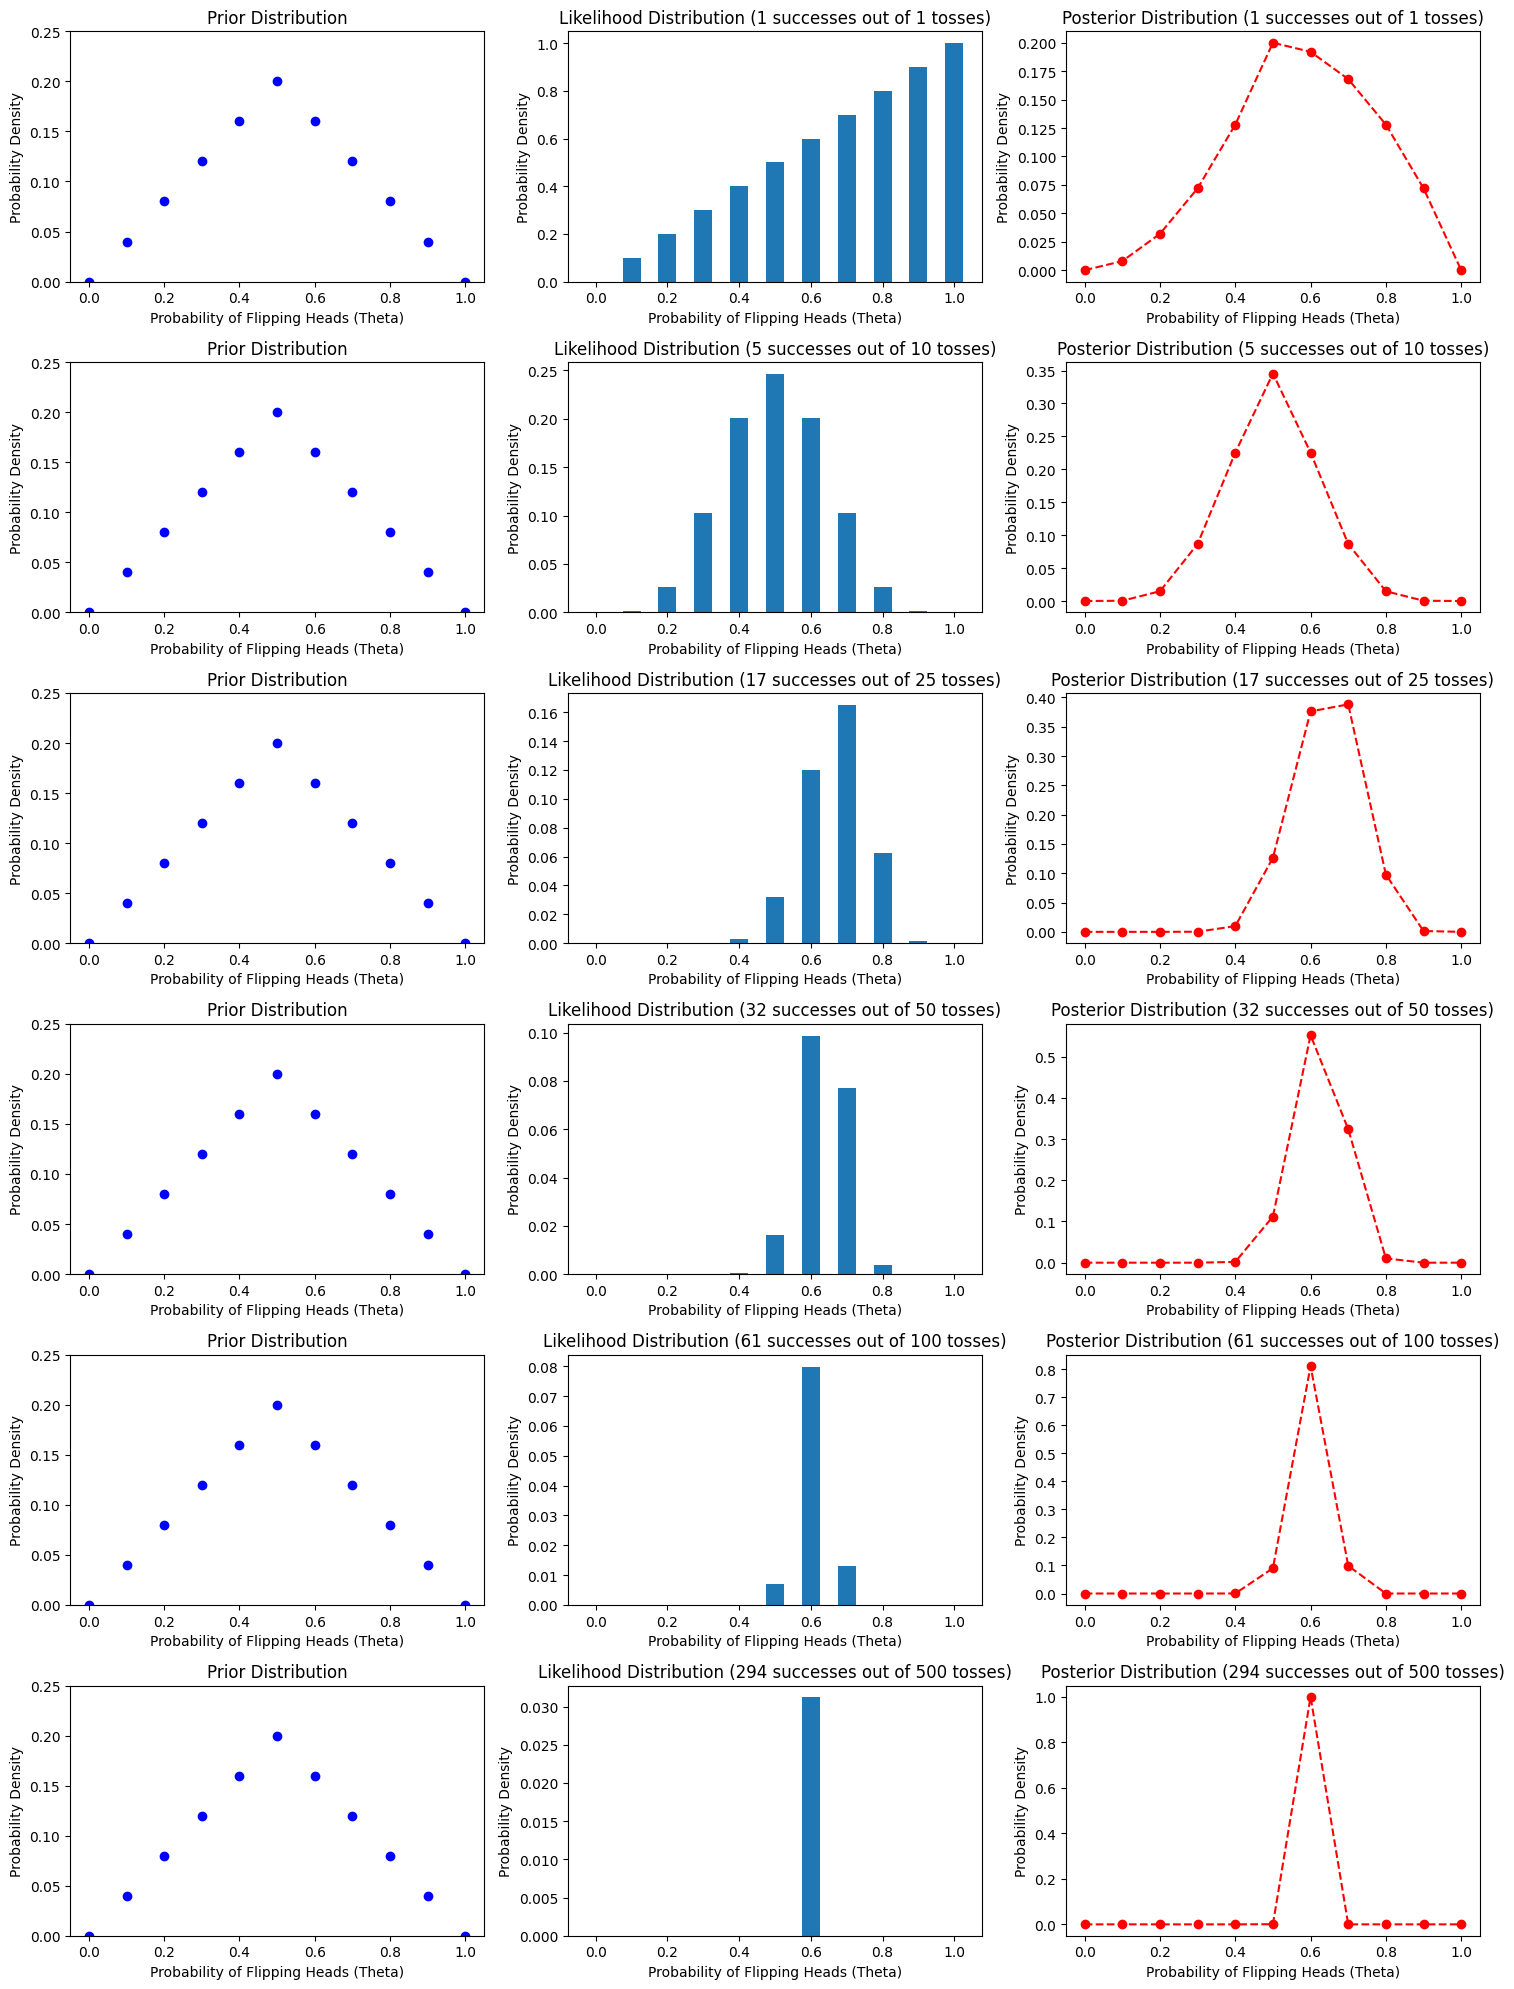

In [ ]:
np.random.seed(42)
prior_distribution = [0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.16, 0.12, 0.08, 0.04, 0]
prior_thetas = np.linspace(0, 1, len(prior_distribution))

prior_df = pd.DataFrame({
    'Theta': prior_thetas,
    'Probability': prior_distribution
})

def plot_distributions(prior_df, likelihood_df, posterior_df, num_tosses, num_successes, ax):
    ax.plot(prior_df['Theta'], prior_df['Probability'], 'bo', label='Prior')
    ax.set_ylim([0, max(prior_df['Probability']) + 0.05])
    ax.set_xlabel('Probability of Flipping Heads (Theta)')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'{num_successes} Successes out of {num_tosses} Tosses')
    ax.legend()

p = 0.6

num_tosses = [1, 10, 25, 50, 100, 500]
num_successes = [1, 5, 17, 32, 61, 294]

fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

for i, (n, heads) in enumerate(zip(num_tosses, num_successes)):

    likelihood_vals = stats.binom.pmf(heads, n, prior_thetas)
    likelihood_df = pd.DataFrame({
        'Theta': prior_thetas,
        'Likelihood': likelihood_vals
    })


    posterior_vals = prior_distribution * likelihood_vals
    posterior_vals /= np.sum(posterior_vals)
    posterior_df = pd.DataFrame({
        'Theta': prior_thetas,
        'Probability': posterior_vals
    })


    axs[i, 0].scatter(prior_df['Theta'], prior_df['Probability'], c='b', marker='o')
    axs[i, 0].set_ylim([0, max(prior_df['Probability']) + 0.05])
    axs[i, 0].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[i, 0].set_ylabel('Probability Density')
    axs[i, 0].set_title('Prior Distribution')

    axs[i, 1].bar(likelihood_df['Theta'], likelihood_df['Likelihood'], width=0.05)
    axs[i, 1].set_title(f'Likelihood Distribution ({num_successes[i]} successes out of {num_tosses[i]} tosses)')
    axs[i, 1].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[i, 1].set_ylabel('Probability Density')

    axs[i, 2].plot(posterior_df['Theta'], posterior_df['Probability'], 'ro--')
    axs[i, 2].set_title(f'Posterior Distribution ({num_successes[i]} successes out of {num_tosses[i]} tosses)')
    axs[i, 2].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[i, 2].set_ylabel('Probability Density')

plt.tight_layout()
plt.show()


But of course, instead of keeping fixed the prior distribution and just looking at what happend when we apply the metodology for different sample size i.e. different number of tosses, we could ask ourselves what could happen if we change approach and consider a dynamic update procedure and by that i mean, let's fix a prior distribution, then by observing a sample of a fixed size (let's say $n$) and given the likelihood distribution we update the prior distribution and get the posterior distribution, but now we consider the posterior distribution of this iteration as the prior distribution of the next iteration and we observe the effect on our "new" prior distribution of $n$ new observations extracted from the same population and what about we keep going like that for many iterations? In the following we can observe some plots in which starting from the same prior distribution as before, we continously update the prior distribution using sets of $n$=5 observations.

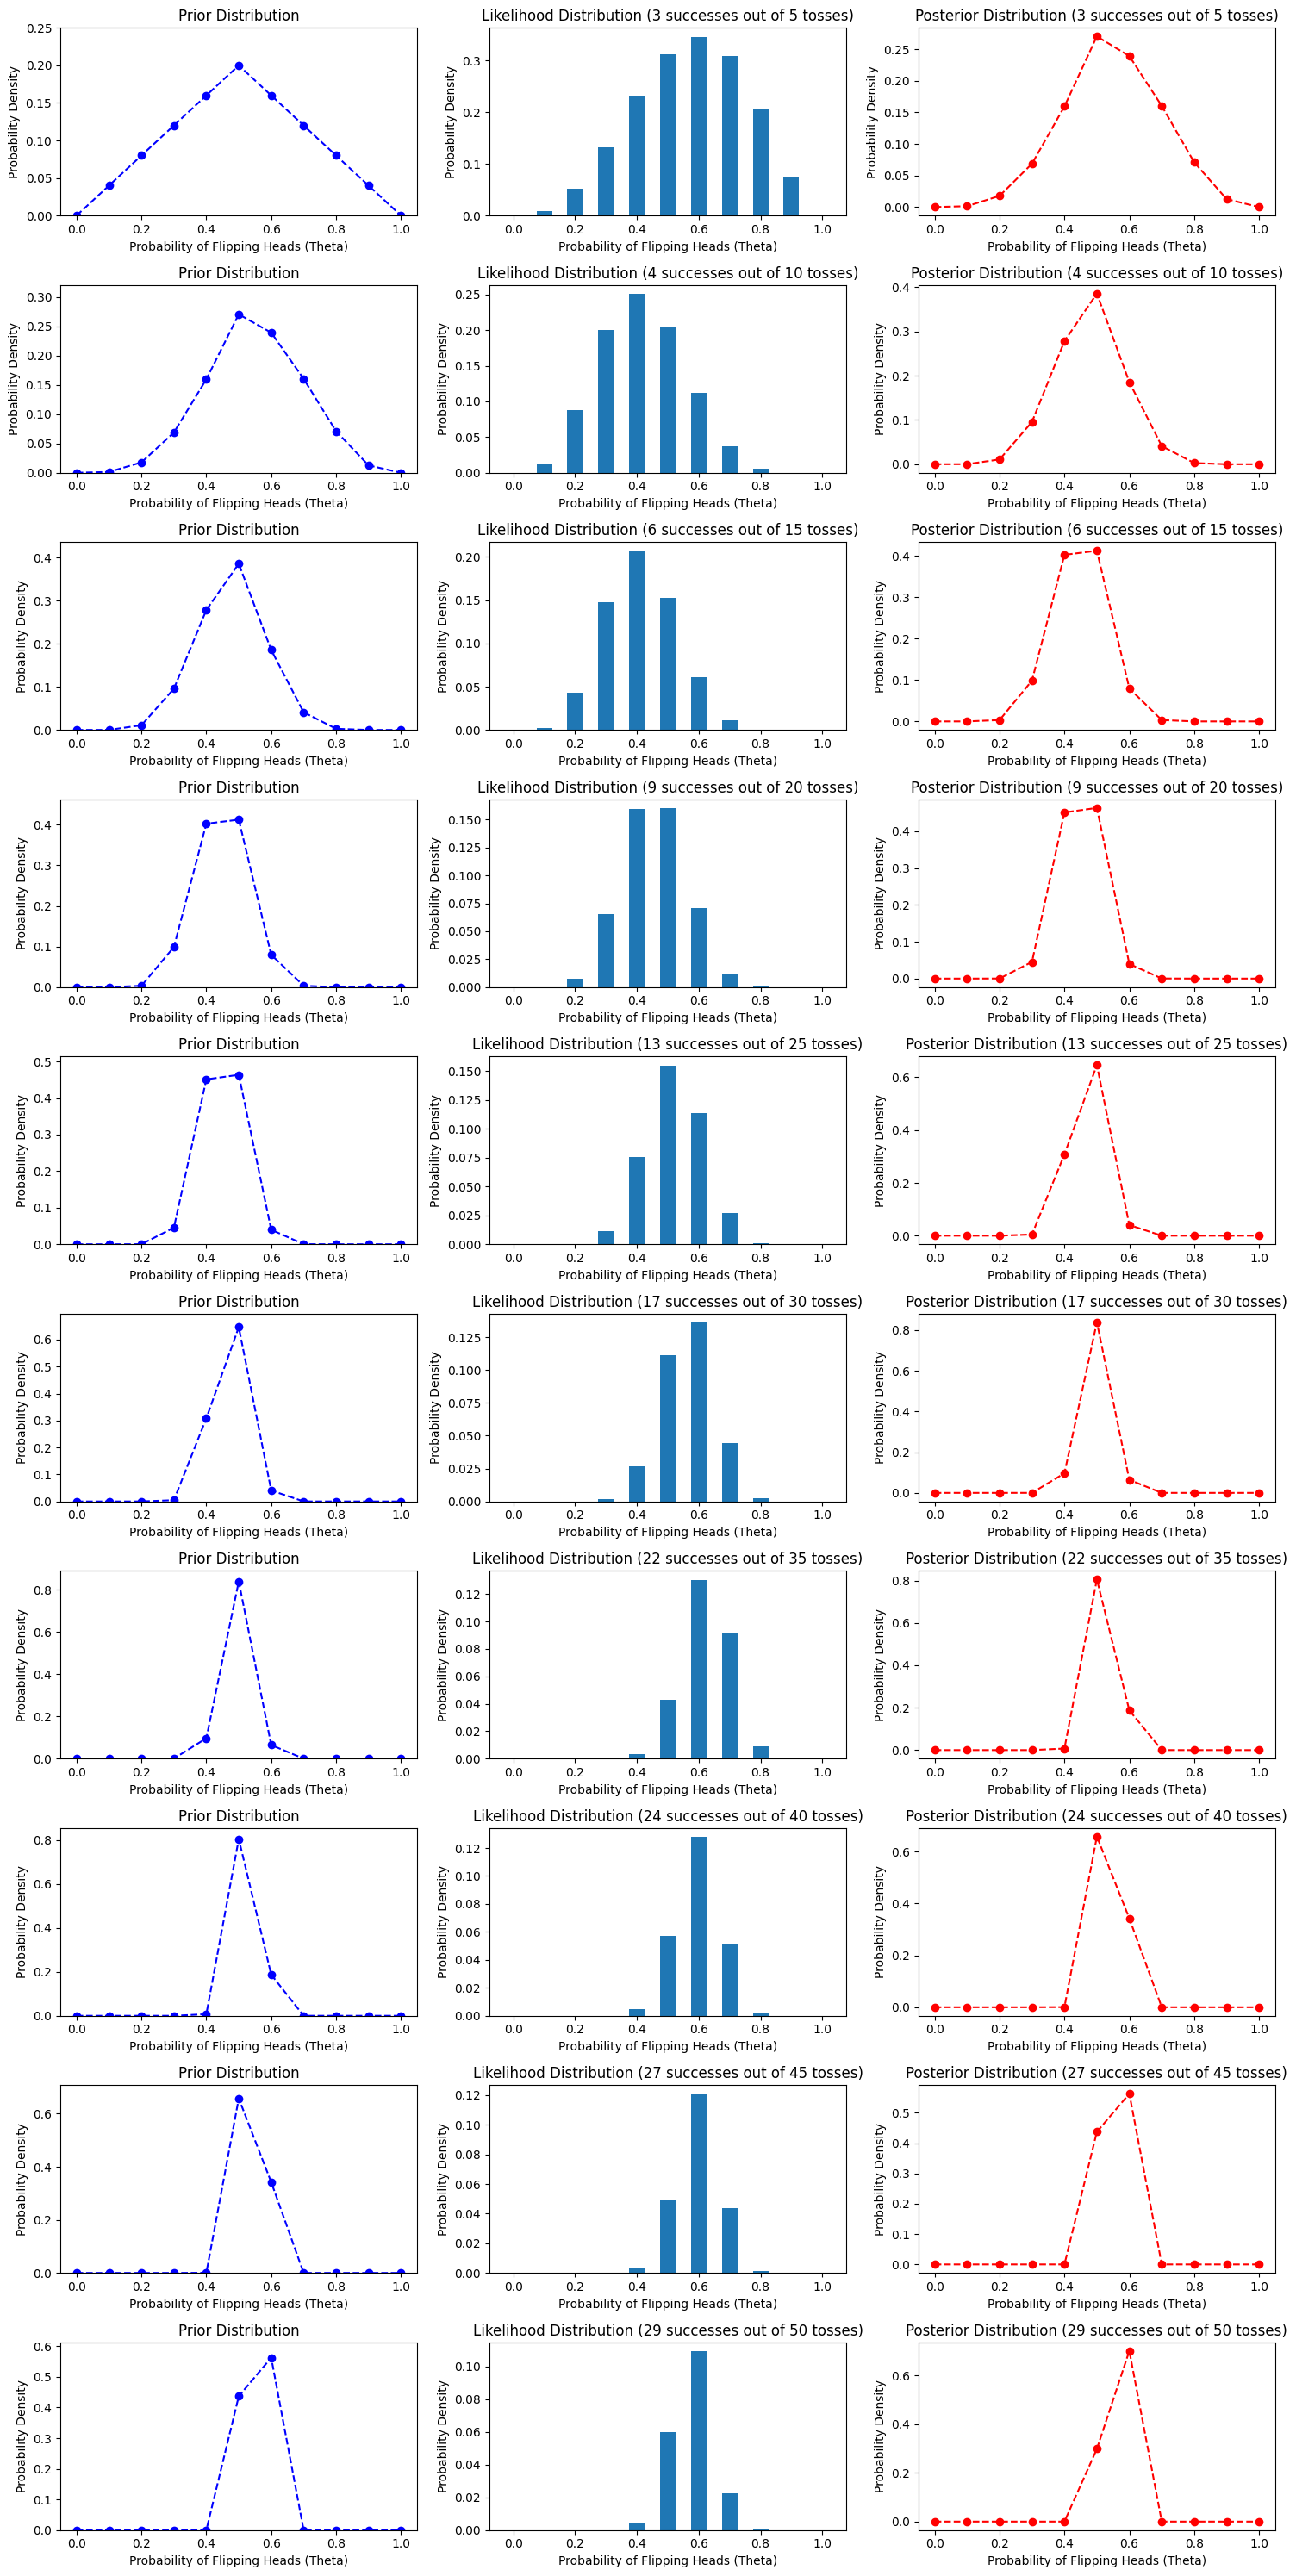

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(15, 30))

prior_distribution = [0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.16, 0.12, 0.08, 0.04, 0]
prior_thetas = np.linspace(0, 1, len(prior_distribution))
prior_df = pd.DataFrame({
    'Theta': prior_thetas,
    'Probability': prior_distribution
})

p = 0.6

for i in range(10):
    if i == 0:
        n = 0
        heads = 0
        prior_df = pd.DataFrame({
            'Theta': prior_thetas,
            'Probability': prior_distribution
        })
    else:
        prior_distribution = posterior_df['Probability']
        prior_thetas = posterior_df['Theta']
        prior_df = pd.DataFrame({
            'Theta': prior_thetas,
            'Probability': prior_distribution
        })
        
    n = n + 5
    heads = heads + np.random.binomial(5, p)

    likelihood_vals = stats.binom.pmf(heads, n, prior_thetas)
    likelihood_df = pd.DataFrame({
        'Theta': prior_thetas,
        'Likelihood': likelihood_vals
    })

    posterior_vals = prior_distribution * likelihood_vals
    posterior_vals /= np.sum(posterior_vals)
    posterior_df = pd.DataFrame({
        'Theta': prior_thetas,
        'Probability': posterior_vals
    })

    axs[i, 0].plot(prior_df['Theta'], prior_df['Probability'], 'bo--', label='Prior')
    axs[i, 0].set_ylim([0, max(prior_df['Probability']) + 0.05])
    axs[i, 0].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[i, 0].set_ylabel('Probability Density')
    axs[i, 0].set_title('Prior Distribution')

    axs[i, 1].bar(likelihood_df['Theta'], likelihood_df['Likelihood'], width=0.05)
    axs[i, 1].set_title(f'Likelihood Distribution ({heads} successes out of {n} tosses)')
    axs[i, 1].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[i, 1].set_ylabel('Probability Density')

    axs[i, 2].plot(posterior_df['Theta'], posterior_df['Probability'], 'ro--')
    axs[i, 2].set_title(f'Posterior Distribution ({heads} successes out of {n} tosses)')
    axs[i, 2].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[i, 2].set_ylabel('Probability Density')

plt.tight_layout()
plt.show()


The following 2 blocks of code are used to generate and save the mp4 animations displaying the way bayesian inference works. 

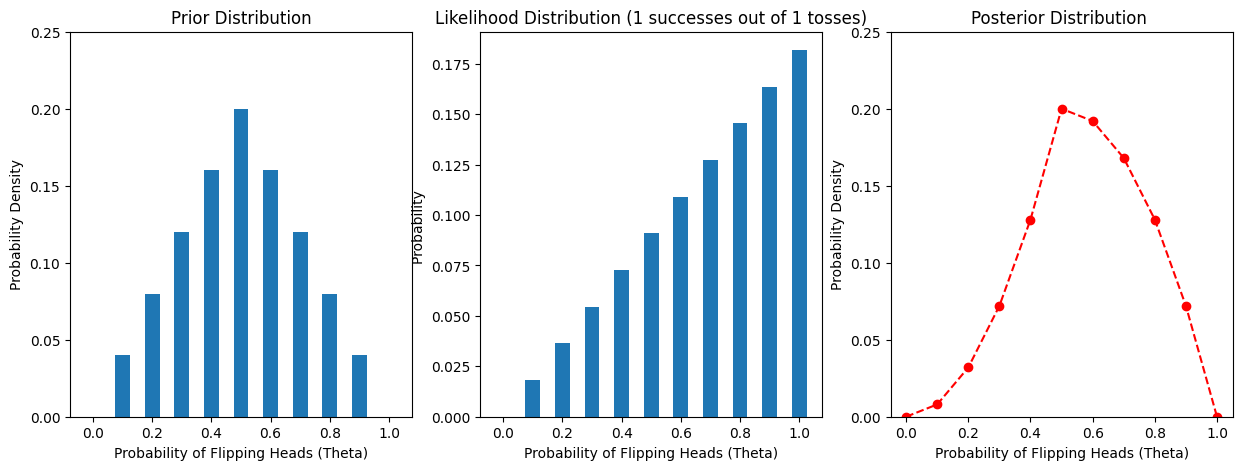

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the prior distribution
prior_distribution = [0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.16, 0.12, 0.08, 0.04, 0]
prior_thetas = np.linspace(0, 1, len(prior_distribution))

# Define the number of tosses and successes
num_tosses = [1, 10, 25, 50, 100, 500]
num_successes = [1, 5, 17, 32, 61, 294]

# Define the figure and subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Define the plot functions
def plot_prior(ax):
    ax.bar(prior_thetas, prior_distribution, width=0.05)
    ax.set_ylim([0, max(prior_distribution) + 0.05])
    ax.set_xlabel('Probability of Flipping Heads (Theta)')
    ax.set_ylabel('Probability Density')
    ax.set_title('Prior Distribution')

def plot_likelihood(ax, n, heads):
    likelihood_vals = stats.binom.pmf(heads, n, prior_thetas)
    likelihood_vals /= np.sum(likelihood_vals)
    ax.bar(prior_thetas, likelihood_vals, width=0.05)
    ax.set_xlabel('Probability of Flipping Heads (Theta)')
    ax.set_ylabel('Probability ')
    ax.set_title(f'Likelihood Distribution ({heads} successes out of {n} tosses)')

def plot_posterior(ax, n, heads):
    likelihood_vals = stats.binom.pmf(heads, n, prior_thetas)
    posterior_vals = prior_distribution * likelihood_vals
    posterior_vals /= np.sum(posterior_vals)
    ax.plot(prior_thetas, posterior_vals, 'ro--')
    ax.set_ylim([0, max(posterior_vals) + 0.05])
    ax.set_xlabel('Probability of Flipping Heads (Theta)')
    ax.set_ylabel('Probability Density')
    ax.set_title('Posterior Distribution ')

# Define the update function for the animation
def update(frame):
    n = num_tosses[frame]
    heads = num_successes[frame]
    axs[0].clear()
    axs[1].clear()
    axs[2].clear()
    plot_prior(axs[0])
    plot_likelihood(axs[1], n, heads)
    plot_posterior(axs[2], n, heads)

# Create the animation
anim = FuncAnimation(fig, update, frames=len(num_tosses), interval=2000, repeat=True)


# Show the animation
anim.save('1_bayesian_update.mp4', writer='ffmpeg')

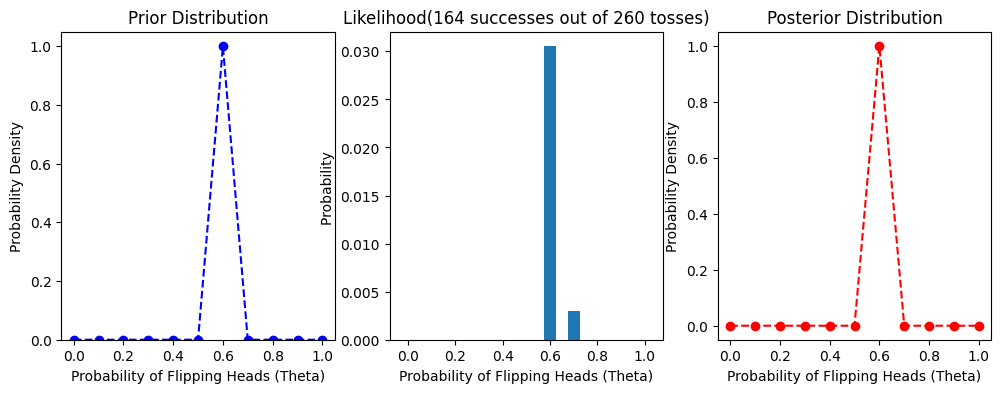

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy import stats
import pandas as pd
np.random.seed(42)
# set up the plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# set up the prior distribution
prior_distribution = [0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.16, 0.12, 0.08, 0.04, 0]
prior_thetas = np.linspace(0, 1, len(prior_distribution))
prior_df = pd.DataFrame({
    'Theta': prior_thetas,
    'Probability': prior_distribution
})

# set up the parameters
p = 0.6
n = 0
heads = 0

# define the update function
def update(i):
    global prior_distribution, prior_thetas, prior_df, p, n, heads

    # update the number of coin tosses and the number of heads
    n += 5
    heads += np.random.binomial(5, p)

    # calculate the likelihood and the posterior distribution
    likelihood_vals = stats.binom.pmf(heads, n, prior_thetas)
    posterior_vals = prior_distribution * likelihood_vals
    posterior_vals /= np.sum(posterior_vals)

    # update the dataframes for the likelihood and posterior distributions
    likelihood_df = pd.DataFrame({
        'Theta': prior_thetas,
        'Likelihood': likelihood_vals
    })
    posterior_df = pd.DataFrame({
        'Theta': prior_thetas,
        'Probability': posterior_vals
    })

    # plot the prior distribution
    axs[0].clear()
    axs[0].plot(prior_df['Theta'], prior_df['Probability'], 'bo--', label='Prior')
    axs[0].set_ylim([0, max(prior_df['Probability']) + 0.05])
    axs[0].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[0].set_ylabel('Probability Density')
    axs[0].set_title('Prior Distribution')

    # plot the likelihood distribution
    axs[1].clear()
    axs[1].bar(likelihood_df['Theta'], likelihood_df['Likelihood'], width=0.05)
    axs[1].set_title(f'Likelihood({heads} successes out of {n} tosses)')
    axs[1].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[1].set_ylabel('Probability ')

    # plot the posterior distribution
    axs[2].clear()
    axs[2].plot(posterior_df['Theta'], posterior_df['Probability'], 'ro--')
    axs[2].set_title('Posterior Distribution')
    axs[2].set_xlabel('Probability of Flipping Heads (Theta)')
    axs[2].set_ylabel('Probability Density')

    # update the prior distribution for the next iteration
    prior_distribution = posterior_df['Probability']
    prior_thetas = posterior_df['Theta']
    prior_df = pd.DataFrame({
        'Theta': prior_thetas,
        'Probability': prior_distribution
    })

# create the animation
ani = animation.FuncAnimation(fig, update, frames=50, repeat=True, interval=500)


# save the animation to a file
ani.save('2_bayesian_update.mp4',writer='ffmpeg')